In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

Загружаем два датасета и удаляем столбцы с индексами

In [2]:
df1=pd.read_excel('Датасет для ВКР_композиты\X_bp.xlsx')
df1=df1.drop(['Unnamed: 0'], axis=1)
df1.shape

(1023, 10)

In [3]:
df1.head(2)

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                         30.0                        22.267857   
1                         50.0                        23.750000   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   

   Потребление смолы, г/м2  
0                    220.0  
1                    220.0

In [4]:
df2=pd.read_excel('Датасет для ВКР_композиты\X_nup.xlsx')
df2=df2.drop(['Unnamed: 0'], axis=1)
df2.shape

(1040, 3)

In [5]:
df2.head(2)

Угол нашивки, град  Шаг нашивки  Плотность нашивки
0                 0.0          4.0               57.0
1                 0.0          4.0               60.0

Объединим датасеты по индексу по типу INNER

In [6]:
df = df1.merge(df2, left_index = True, right_index = True, how = 'inner')
df.describe().T

count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   

                                              75%          max  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901

Посмотрим на типы данных и отсутсвующие значения.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки      

Все данные имеют тип float64, пропущенных значений нет.

Поиск дубликатов

In [8]:
df.duplicated().sum()

0

Дубликатов нет.

### Разведочный анализ данных. 
Необходимо нарисовать гистограммы распределения каждой из переменной,
диаграммы ящика с усами, попарные графики рассеяния точек. Необходимо также для каждой колонке получить среднее, 
медианное значение, провести анализ и исключение выбросов, проверить наличие пропусков.

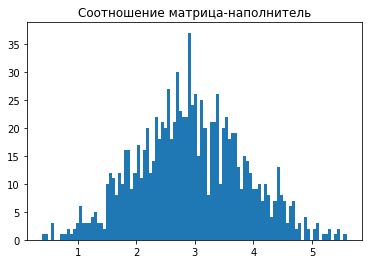

In [9]:
plt.hist(df['Соотношение матрица-наполнитель'], bins = 100);
plt.title('Соотношение матрица-наполнитель');

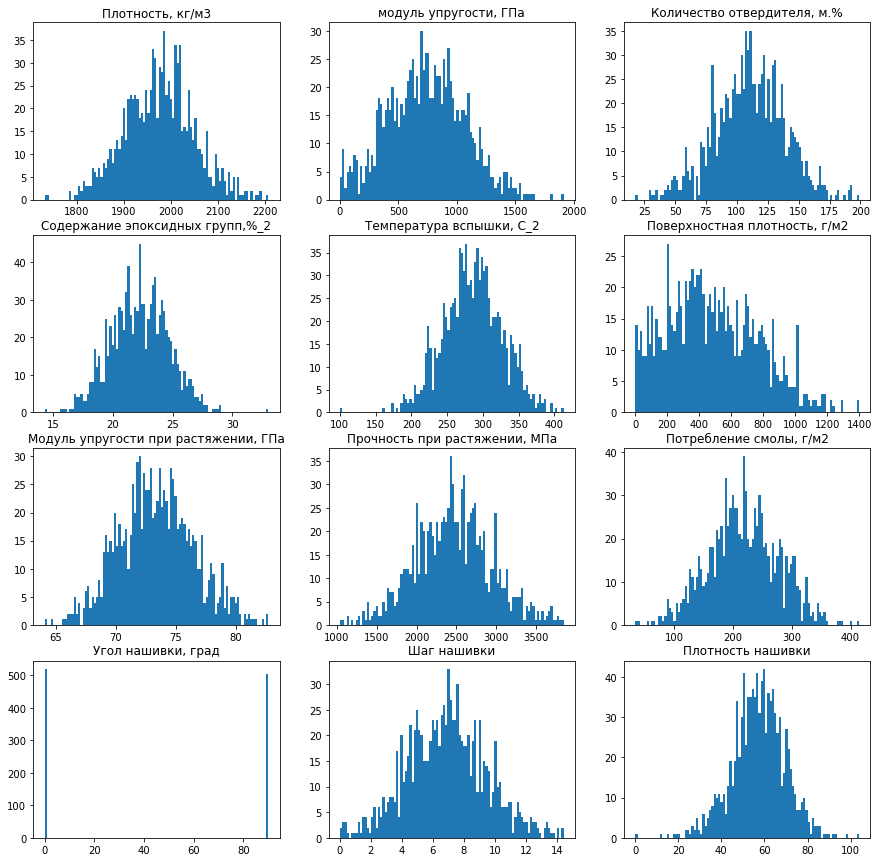

In [10]:
col_matr=np.array([['Плотность, кг/м3', 'модуль упругости, ГПа',  'Количество отвердителя, м.%'], 
                   ['Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2', 'Поверхностная плотность, г/м2'], 
                   ['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа', 'Потребление смолы, г/м2'],
                  ['Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки']])

fig, axs = plt.subplots(4, 3, figsize=(15, 15))
for i in range(4):
    for j in range(3):
        axs[i, j].hist(df[col_matr[i][j]], bins = 100)
        axs[i, j].set_title(col_matr[i][j])

### Диаграммы рассеяния

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


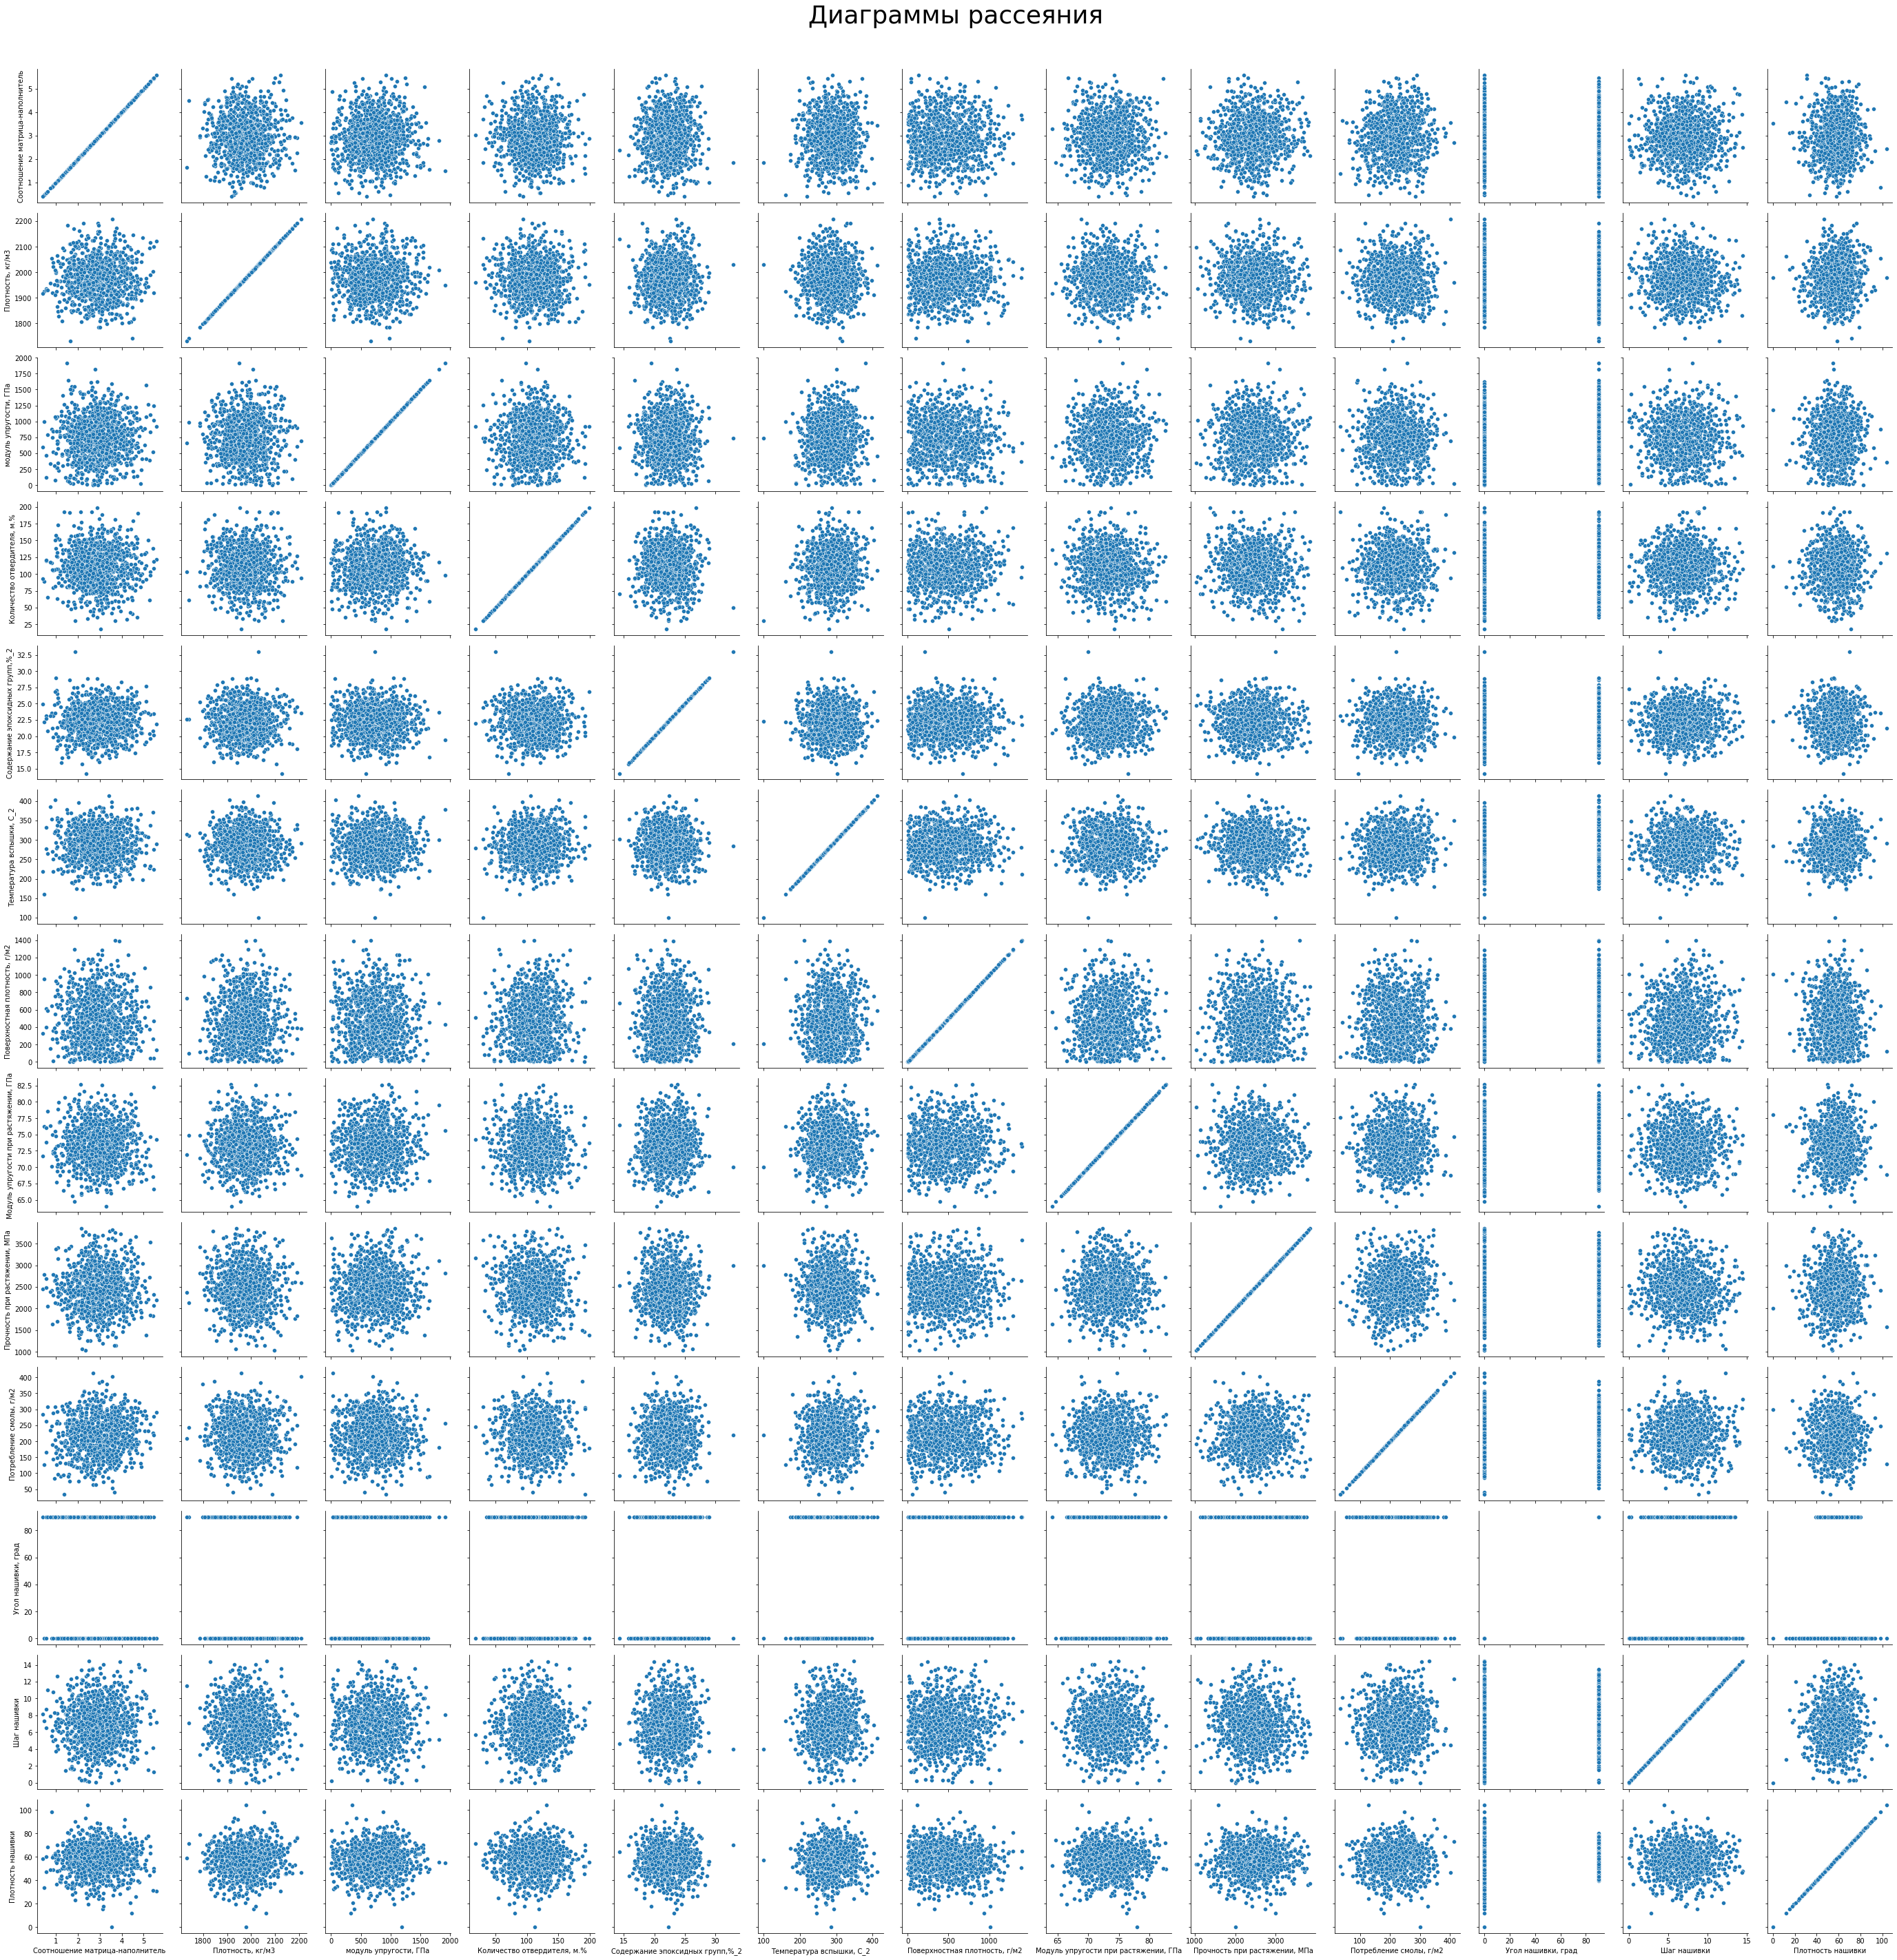

In [11]:
grid = sns.PairGrid(data = df, size = 3)
grid.map(sns.scatterplot)
plt.suptitle('Диаграммы рассеяния', size = 36, y = 1.02);

In [12]:
for x in df:
    print(f'{x}: среднее = {df[x].mean()}, медиана = {df[x].median()}')

Соотношение матрица-наполнитель: среднее = 2.9303657734325506, медиана = 2.90687765033521
Плотность, кг/м3: среднее = 1975.7348881101548, медиана = 1977.62165679058
модуль упругости, ГПа: среднее = 739.9232327560719, медиана = 739.664327697792
Количество отвердителя, м.%: среднее = 110.57076864736258, медиана = 110.564839894065
Содержание эпоксидных групп,%_2: среднее = 22.24438954776772, медиана = 22.2307437560244
Температура вспышки, С_2: среднее = 285.88215135162227, медиана = 285.896812331237
Поверхностная плотность, г/м2: среднее = 482.7318330384181, медиана = 451.86436518306
Модуль упругости при растяжении, ГПа: среднее = 73.32857125009073, медиана = 73.2688045943481
Прочность при растяжении, МПа: среднее = 2466.9228426979025, медиана = 2459.52452600309
Потребление смолы, г/м2: среднее = 218.42314367654265, медиана = 219.198882195134
Угол нашивки, град: среднее = 44.252199413489734, медиана = 0.0
Шаг нашивки: среднее = 6.899222077675024, медиана = 6.9161438559491
Плотность нашивк

Корреляционная матрица

<AxesSubplot:>

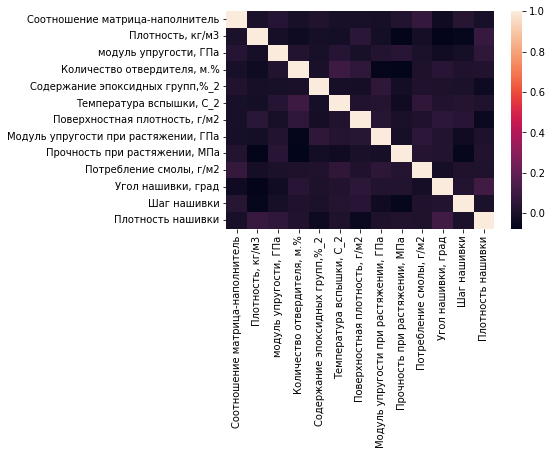

In [13]:
sns.heatmap(df.corr())

### Ящики с усами

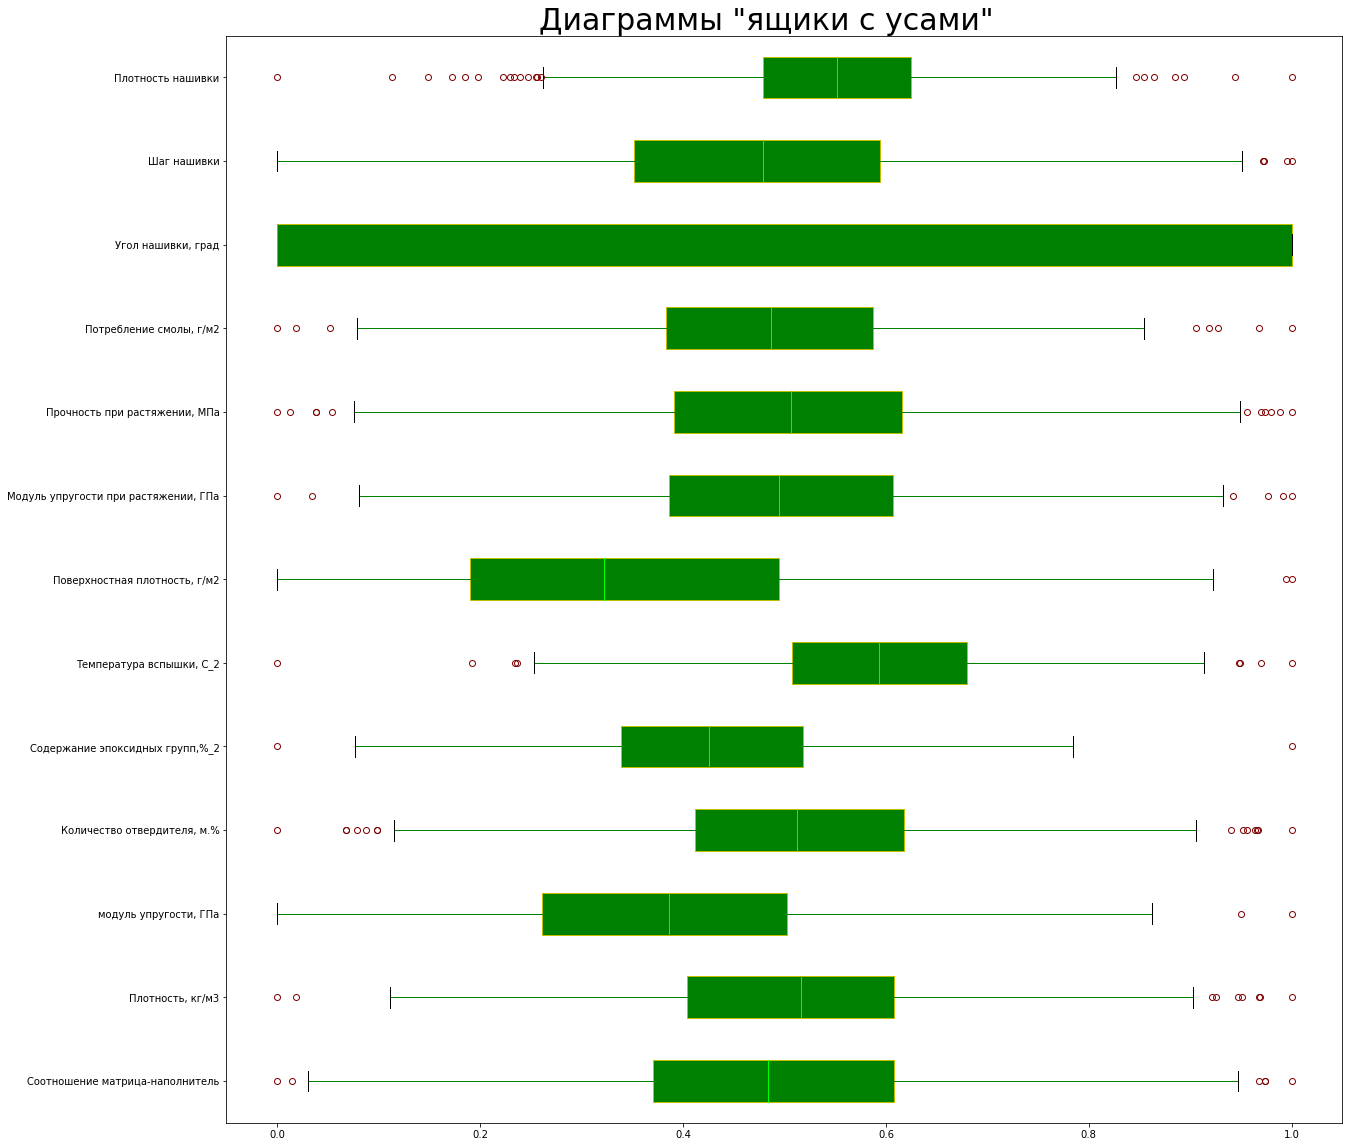

In [14]:
scaler = MinMaxScaler()
scaler.fit(df)
plt.figure(figsize = (20, 20))
plt.suptitle('Диаграммы "ящики с усами"', y = 0.9 ,
             fontsize = 30)
plt.boxplot(pd.DataFrame(scaler.transform(df)), labels = df.columns,patch_artist = True, meanline = True, vert = False, boxprops = dict(facecolor = 'g', color = 'y'),medianprops = dict(color = 'lime'), whiskerprops = dict(color="g"), capprops = dict(color = "black"), flierprops = dict(color = "y", markeredgecolor = "maroon"))
plt.show()

## Предобработка данных

### Удаление выбросов
Удалим выбросы с помощью интерквартильного размаха

In [15]:
df.shape

(1023, 13)

In [16]:
for i in df.drop(['Угол нашивки, град'], axis=1).columns:
    quart3, quart1 = np.percentile(df.loc[:,i], [75,25])
    max = quart3 + (1.5 * (quart3-quart1))
    min = quart1 - (1.5 * (quart3-quart1))
    df.loc[df[i] < min, i] = np.nan
    df.loc[df[i] > max, i] = np.nan

In [17]:
df.isnull().sum()

Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       21
dtype: int64

Удалим выбросы.

In [18]:
df=df.dropna()

In [19]:
df.shape

(936, 13)

## Обучение алгоритмов машинного обучения, которые будут определять значения:
-	Модуля упругости при растяжении, ГПа
-	Прочности при растяжении, МПа

In [20]:
# Импорт из библиотек машинного обучения
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from autogluon.tabular import TabularPredictor
from sklearn.model_selection import GridSearchCV

C:\Users\Kh_Al\AppData\Roaming\Python\Python39\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Тк задачу необходимо решать дважды для разных столбцов, напишем функцию

In [21]:
results1={}
results2={}
train1={}
train2={}

def choosen_target(target, results, train):
    X, X_test, y, y_test = train_test_split(df.drop([target], axis=1), df[target], test_size = 0.3, random_state = 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler.fit(X)
    X = scaler.transform(X)
    X_test = scaler.transform(X_test)
    
    # Функция для обучения, прогноза. На выходе выдаёт ошибку
    # Кажется логичным использовать в качестве метрики mae
    def models(model):
        model.fit(X, y)
        pred=model.predict(X_test)
        pred_train=model.predict(X)
        return mean_absolute_error(pred, y_test), mean_absolute_error(pred_train, y) 
    
    print(f'MAE для \"{target}\"')
    linreg=LinearRegression()
    svm=SVR()
    knreg=KNeighborsRegressor()
    randfor=RandomForestRegressor(random_state=1)
    gradboost=GradientBoostingRegressor(random_state=1)
    xgboost=XGBRegressor(random_state=1)
    regressors=[linreg, svm, knreg, randfor, gradboost, xgboost]
    names=['Линейная регрессия', 'SVR', 'KNeighbors', 'RandomForest', 'GradientBoosting (sklearn)', 'XGBoost']
    for name, regressor in zip(names, regressors):
        err, err_train=models(regressor)
        print('train', name, err_train)
        print('test', name, err)
        results.update({name: [err]})
        train.update({name: [err_train]})    

In [22]:
def fu_for_autogluon(target, results, train):
    df_train, df_test=train_test_split(df, test_size = 0.3, random_state = 1)
    predictor = TabularPredictor(label=target).fit(df_train)
    y_test = df_test[target]
    y= df_train[target]
    y_pred = predictor.predict(df_test.drop([target], axis=1))
    y_pred_train = predictor.predict(df_train.drop([target], axis=1))
    err=mean_absolute_error(y_pred, y_test)
    err_train=mean_absolute_error(y_pred_train, y)
    print('train autogluon, mae=', err_train)
    print('test autogluon, mae=', err)
    results.update({'Autogluon': [err]})
    train.update({'Autogluon': [err_train]})

In [23]:
def hyper_gradboost(target, results, train):
    X, X_test, y, y_test = train_test_split(df.drop([target], axis=1), df[target], test_size = 0.3, random_state = 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler.fit(X)
    X = scaler.transform(X)
    X_test = scaler.transform(X_test)
    best_params={}
    loss = ['ls', 'absolute_error', 'huber']
    #деревья
    n_estimators = [100, 500, 900, 1100, 1500]
    # Глубина деревьев
    max_depth = [2, 3, 5, 10, 15]
    # минимальный размер листа
    min_samples_leaf = [1, 2, 4, 6, 8]
    # Минимальное количество ветвлений на узел 
    min_samples_split = [2, 4, 6, 10]
    # Размер делящегося множества
    max_features = ['auto', 'sqrt', 'log2', None]

    # Сетка гиперпарраметров
    hyperparameter_grid = [{'loss': loss},
                           {'n_estimators': n_estimators},
                           {'max_depth': max_depth},
                           {'min_samples_leaf': min_samples_leaf},
                           {'min_samples_split': min_samples_split},
                           {'max_features': max_features}]

    for hyperparameter in hyperparameter_grid:
        model=GradientBoostingRegressor()
        grid_result = GridSearchCV(estimator = model, param_grid=hyperparameter, cv = 10, 
                                   scoring = 'neg_mean_absolute_error', verbose = 1,
                                   n_jobs = -1, return_train_score = True)
        grid_result.fit(X, y)
        best_params.update(grid_result.best_params_)
    gradboost=GradientBoostingRegressor(loss=best_params['loss'], 
                                        n_estimators=best_params['n_estimators'], 
                                        max_depth=best_params['max_depth'], 
                                        min_samples_leaf=best_params['min_samples_leaf'], 
                                        min_samples_split=best_params['min_samples_split'], 
                                        max_features=best_params['max_features'])
    gradboost.fit(X, y)
    y_pred=gradboost.predict(X_test)
    y_pred_train=gradboost.predict(X)
    err=mean_absolute_error(y_pred, y_test)
    err_train=mean_absolute_error(y_pred_train, y)
    print(f'GradBoost (train) after hyperparam_opt, mae= {err_train}')
    print(f'GradBoost after (test) hyperparam_opt, mae= {err}')
    results.update({'GradBoost_HO': [err]})
    train.update({'GradBoost_HO': [err_train]})

### Определение значений модуля упругости при растяжении

In [24]:
choosen_target("Модуль упругости при растяжении, ГПа", results1, train1)

MAE для "Модуль упругости при растяжении, ГПа"
train Линейная регрессия 2.386590781402255
test Линейная регрессия 2.5464192980820095
train SVR 2.0981972331821868
test SVR 2.6116531333051856
train KNeighbors 2.125103949912056
test KNeighbors 2.818761217799366
train RandomForest 0.9143059191871364
test RandomForest 2.5615581521885664
train GradientBoosting (sklearn) 1.6880853074396407
test GradientBoosting (sklearn) 2.673922222736651
train XGBoost 0.04145960218810298
test XGBoost 2.836931371656709


In [25]:
fu_for_autogluon("Модуль упругости при растяжении, ГПа", results1, train1)

No path specified. Models will be saved in: "AutogluonModels/ag-20221220_145522\"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20221220_145522\"
AutoGluon Version:  0.5.2
Python Version:     3.9.12
Operating System:   Windows
Train Data Rows:    655
Train Data Columns: 12
Label Column: Модуль упругости при растяжении, ГПа
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (81.4171259444738, 65.5533359100584, 73.33001, 3.02786)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2649.88 MB
	Train Data (Original)  Memory Usage

train autogluon, mae= 2.3113977849556515
test autogluon, mae= 2.5477529120587277


In [26]:
hyper_gradboost("Модуль упругости при растяжении, ГПа", results1, train1)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for each of 4 candidates, totalling 40 fits
GradBoost (train) after hyperparam_opt, mae= 2.078628326048034
GradBoost after (test) hyperparam_opt, mae= 2.5832219351980394


### Определение значений прочности при растяжении

In [27]:
choosen_target("Прочность при растяжении, МПа", results2, train2)

MAE для "Прочность при растяжении, МПа"
train Линейная регрессия 366.1857045030687
test Линейная регрессия 370.5426179675644
train SVR 368.71734967397583
test SVR 366.5975512794085
train KNeighbors 319.1967346741664
test KNeighbors 405.2389030228364
train RandomForest 138.57308079107088
test RandomForest 373.26077380458025
train GradientBoosting (sklearn) 248.71252905738666
test GradientBoosting (sklearn) 390.04950189991825
train XGBoost 7.81563957270638
test XGBoost 391.90658604954945


In [28]:
fu_for_autogluon("Прочность при растяжении, МПа", results2, train2)

No path specified. Models will be saved in: "AutogluonModels/ag-20221220_145637\"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20221220_145637\"
AutoGluon Version:  0.5.2
Python Version:     3.9.12
Operating System:   Windows
Train Data Rows:    655
Train Data Columns: 12
Label Column: Прочность при растяжении, МПа
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (3705.67252336168, 1264.31068218031, 2481.26168, 466.91599)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2051.27 MB
	Train Data (Original)  Memory Usage: 0

train autogluon, mae= 275.0235832958617
test autogluon, mae= 373.7778693276293


In [29]:
hyper_gradboost("Прочность при растяжении, МПа", results2, train2)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for each of 4 candidates, totalling 40 fits
GradBoost (train) after hyperparam_opt, mae= 322.92687531258247
GradBoost after (test) hyperparam_opt, mae= 375.38057907539417


In [30]:
print(f'Среднее абсолютное отклонение {df["Модуль упругости при растяжении, ГПа"].mad()}')
results1.update({'Среднее абсолютное отклонение': [df["Модуль упругости при растяжении, ГПа"].mad()]})

Среднее абсолютное отклонение 2.4487129099420786


In [31]:
print(f'Среднее абсолютное отклонение {df["Прочность при растяжении, МПа"].mad()}')
results2.update({'Среднее абсолютное отклонение': [df["Прочность при растяжении, МПа"].mad()]})

Среднее абсолютное отклонение 368.6882107135672


In [32]:
plt.rcParams['figure.figsize'] = (15, 6)

Text(0.5, 1.0, 'Модуль упругости при растяжении (train)')

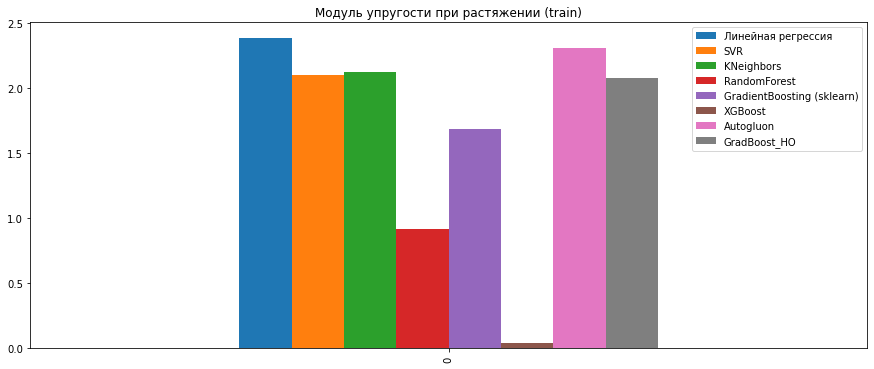

In [33]:
pd.DataFrame(data=train1).plot.bar()
plt.title("Модуль упругости при растяжении (train)")

Text(0.5, 1.0, 'Прочность при растяжении (train)')

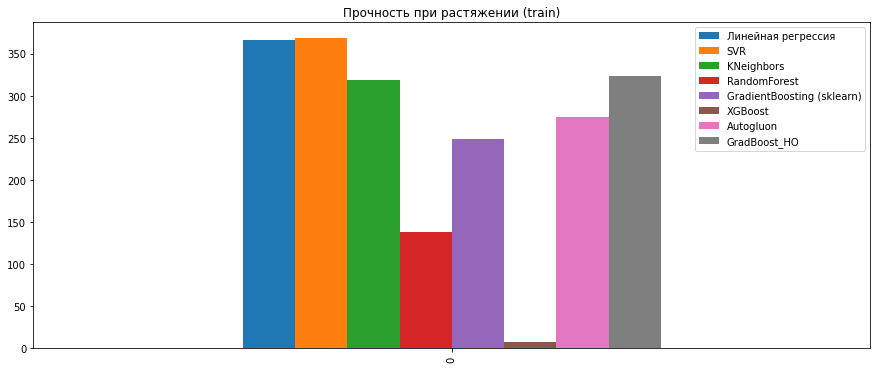

In [34]:
pd.DataFrame(data=train2).plot.bar()
plt.title("Прочность при растяжении (train)")

Text(0.5, 1.0, 'Модуль упругости при растяжении (test)')

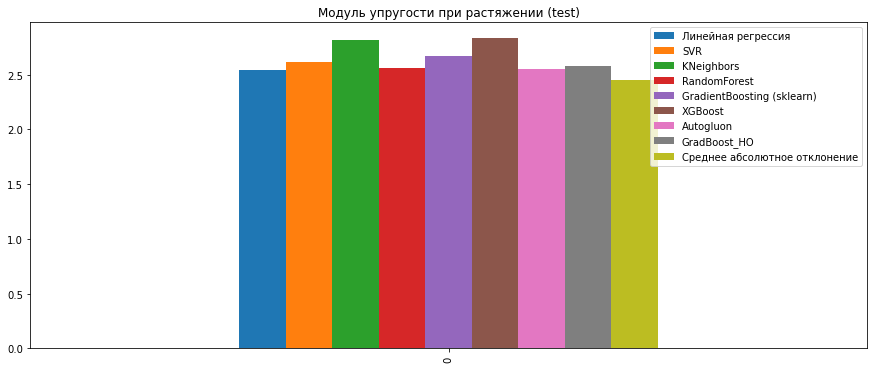

In [35]:
pd.DataFrame(data=results1).plot.bar()
plt.title("Модуль упругости при растяжении (test)")

Text(0.5, 1.0, 'Прочность при растяжении (test)')

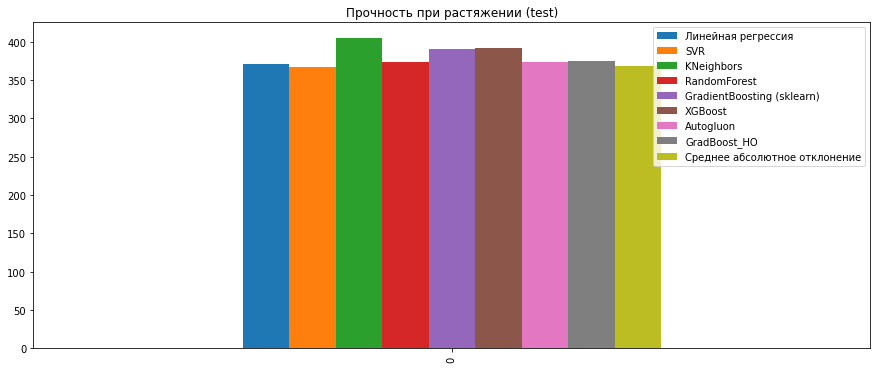

In [36]:
pd.DataFrame(data=results2).plot.bar()
plt.title("Прочность при растяжении (test)")

## Нейронная сеть для рекомендаций соотношения матрица-наполнитель

In [37]:
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasRegressor


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
import joblib

import warnings
warnings.filterwarnings('ignore')

In [38]:
X, X_test, y, y_test = train_test_split(df.drop(['Соотношение матрица-наполнитель'], axis=1), df['Соотношение матрица-наполнитель'], test_size = 0.3, random_state = 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [39]:
def create_model(lyrs=[32], act='softmax', opt='SGD', dr=0.1, activation='relu', loss='mae'):
    model = Sequential()
    model.add(Dense(lyrs[0], input_dim=X.shape[1], activation=act)) 
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))
    
    model.add(Dropout(dr))
    model.add(Dense(1, activation='sigmoid')) 
    
    model.compile(loss=loss, optimizer=opt)
 
    return model

In [40]:
def param_grid(params): 
    # сетка гиперпараметров
    grid = GridSearchCV(
    estimator=KerasRegressor(create_model, verbose=0),
    param_grid=params,
    scoring='neg_mean_absolute_error',
    cv=3,
    )
    
    grid_result = grid.fit(X, y)
    
    # Вывод результатов
    print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print(f'%{mean} ({stdev}) with: {param}')
    return grid_result.best_params_

In [41]:
# Задаём сетку гиперпараметров
batch_size = [4, 10, 20]
epochs = [10, 50, 100]
params = dict(batch_size=batch_size, epochs=epochs)
best_par1=param_grid(params)

Best: -1.910390878870011 using {'batch_size': 4, 'epochs': 100}
%-2.0171700372336967 (0.0917772444917153) with: {'batch_size': 4, 'epochs': 10}
%-1.9208302578170626 (0.09423075483436594) with: {'batch_size': 4, 'epochs': 50}
%-1.910390878870011 (0.09424607140687631) with: {'batch_size': 4, 'epochs': 100}
%-2.1572098197637697 (0.09423196847267776) with: {'batch_size': 10, 'epochs': 10}
%-1.9552842047648251 (0.09461607077372229) with: {'batch_size': 10, 'epochs': 50}
%-1.926228174785832 (0.09429750251478544) with: {'batch_size': 10, 'epochs': 100}
%-2.2638182655604955 (0.09535751057851195) with: {'batch_size': 20, 'epochs': 10}
%-2.017255812435828 (0.09507309534826369) with: {'batch_size': 20, 'epochs': 50}
%-1.9553346599563823 (0.09492896118172447) with: {'batch_size': 20, 'epochs': 100}


In [42]:
best_batch_size=best_par1['batch_size']
best_epoch=best_par1['epochs']
print(best_batch_size, best_epoch)

4 100


In [43]:
# Подбор алгоритма
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Nadam']
params = dict(opt=optimizer)

best_par2=param_grid(params)

Best: -2.3722271660987233 using {'opt': 'Nadam'}
%-2.3858731516302907 (0.10499210388350298) with: {'opt': 'SGD'}
%-2.3874241236795783 (0.09719515835604105) with: {'opt': 'RMSprop'}
%-2.401117332686604 (0.09004705159222198) with: {'opt': 'Adagrad'}
%-2.3953850968710904 (0.0904241374052074) with: {'opt': 'Adadelta'}
%-2.3722912457132916 (0.09793019731582071) with: {'opt': 'Adam'}
%-2.3722271660987233 (0.09559238032625317) with: {'opt': 'Nadam'}


In [44]:
best_opt=best_par2['opt']
best_opt

'Nadam'

In [45]:
# Подбор количества слоёв
layers = [[8],[16, 4],[32, 8, 3],[12, 6, 3], [64, 64, 3], [128, 64, 16, 3]]
params = dict(lyrs=layers)

best_par3=param_grid(params)

Best: -2.3317406954666247 using {'lyrs': [12, 6, 3]}
%-2.3793158616647245 (0.11625930825388572) with: {'lyrs': [8]}
%-2.4270145206975395 (0.05245535458489864) with: {'lyrs': [16, 4]}
%-2.3631665990421578 (0.14064863771356806) with: {'lyrs': [32, 8, 3]}
%-2.3317406954666247 (0.03993223888868246) with: {'lyrs': [12, 6, 3]}
%-2.440804845450062 (0.13769362261027407) with: {'lyrs': [64, 64, 3]}
%-2.4233547251690983 (0.11470358014244239) with: {'lyrs': [128, 64, 16, 3]}


In [46]:
best_lyrs=best_par3['lyrs']
best_lyrs

[12, 6, 3]

In [47]:
# Подбор функций активации
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
params = dict(act=activation)

best_par4=param_grid(params)

Best: -2.312171032282106 using {'act': 'tanh'}
%-2.3950176527068066 (0.10070461513029626) with: {'act': 'softmax'}
%-2.3427263863040624 (0.21235381627090594) with: {'act': 'softplus'}
%-2.415661325086502 (0.11447938756958834) with: {'act': 'softsign'}
%-2.3137148315541824 (0.10740133216269465) with: {'act': 'relu'}
%-2.312171032282106 (0.08356539604131658) with: {'act': 'tanh'}
%-2.3623074589602964 (0.08216351360281711) with: {'act': 'sigmoid'}
%-2.3277578002774497 (0.18339028173302635) with: {'act': 'hard_sigmoid'}
%-2.318820935922649 (0.214739661267824) with: {'act': 'linear'}


In [48]:
best_act=best_par4['act']
best_act

'tanh'

In [49]:
# Подбор dropout-ов
drops = [0.0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5]
params = dict(dr=drops)

best_par5=param_grid(params)

Best: -2.3755582801939323 using {'dr': 0.05}
%-2.396236345143029 (0.09182703367017522) with: {'dr': 0.0}
%-2.3758206525732826 (0.09059942916141238) with: {'dr': 0.01}
%-2.3755582801939323 (0.09958865551729516) with: {'dr': 0.05}
%-2.389882797096701 (0.09541586614935853) with: {'dr': 0.1}
%-2.3766416706447906 (0.10423157683282137) with: {'dr': 0.2}
%-2.3916175526413985 (0.08990554294740151) with: {'dr': 0.3}
%-2.3931207329396265 (0.08688423835141051) with: {'dr': 0.5}


In [50]:
best_dr=best_par5['dr']

In [51]:
# Выбранные параметры для нейросети
print(f'Слои: {best_lyrs}')
print(f'Dropout: {best_dr}')
print(f'Функция активации: {best_act}')
print(f'Количество эпох: {best_epoch}')
print(f'Размер батча: {best_batch_size}')
print(f'best optimizer: {best_opt}')

Слои: [12, 6, 3]
Dropout: 0.05
Функция активации: tanh
Количество эпох: 100
Размер батча: 4
best optimizer: Nadam


In [52]:
# построение окончательной модели
model = create_model(lyrs=best_lyrs, dr=best_dr, opt=best_opt, act=best_act)

print(model.summary())

Model: "sequential_113"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_258 (Dense)           (None, 12)                156       
                                                                 
 dense_259 (Dense)           (None, 6)                 78        
                                                                 
 dense_260 (Dense)           (None, 3)                 21        
                                                                 
 dropout_113 (Dropout)       (None, 3)                 0         
                                                                 
 dense_261 (Dense)           (None, 1)                 4         
                                                                 
Total params: 259
Trainable params: 259
Non-trainable params: 0
_________________________________________________________________
None


In [53]:
# обучаем нейросеть
model_hist = model.fit(X, 
    y, 
    epochs = best_epoch,
    batch_size=best_batch_size,
    verbose = 1, 
    validation_split = 0.2)

Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 2.1156 - val_loss: 2.1871
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 2.0078 - val_loss: 2.1276
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 1.9657 - val_loss: 2.0954
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 1.9417 - val_loss: 2.0755
Epoch 5/100
131/131 [==============================] - 0s 2ms/step - loss: 1.9251 - val_loss: 2.0622
Epoch 6/100
131/131 [==============================] - 0s 2ms/step - loss: 1.9139 - val_loss: 2.0530
Epoch 7/100
131/131 [==============================] - 0s 2ms/step - loss: 1.9059 - val_loss: 2.0462
Epoch 8/100
131/131 [==============================] - 0s 2ms/step - loss: 1.9005 - val_loss: 2.0412
Epoch 9/100
131/131 [==============================] - 0s 2ms/step - loss: 1.8956 - val_loss: 2.0373
Epoch 10/100
131/131 [==============================] - 0s 2ms/step - loss: 1.8913 - val_lo

131/131 [==============================] - 0s 2ms/step - loss: 1.8719 - val_loss: 2.0171
Epoch 82/100
131/131 [==============================] - 0s 2ms/step - loss: 1.8721 - val_loss: 2.0171
Epoch 83/100
131/131 [==============================] - 0s 2ms/step - loss: 1.8721 - val_loss: 2.0171
Epoch 84/100
131/131 [==============================] - 0s 2ms/step - loss: 1.8719 - val_loss: 2.0171
Epoch 85/100
131/131 [==============================] - 0s 2ms/step - loss: 1.8719 - val_loss: 2.0171
Epoch 86/100
131/131 [==============================] - 0s 2ms/step - loss: 1.8719 - val_loss: 2.0171
Epoch 87/100
131/131 [==============================] - 0s 2ms/step - loss: 1.8719 - val_loss: 2.0171
Epoch 88/100
131/131 [==============================] - 0s 2ms/step - loss: 1.8719 - val_loss: 2.0171
Epoch 89/100
131/131 [==============================] - 0s 2ms/step - loss: 1.8718 - val_loss: 2.0171
Epoch 90/100
131/131 [==============================] - 0s 2ms/step - loss: 1.8719 - val_loss: 

In [54]:
# оценим модель. Результат mae для тестовой выборки
scores = model.evaluate(X_test, y_test)
scores

9/9 [==============================] - 0s 3ms/step - loss: 1.9986


1.9986492395401

In [59]:
# Среднее абсолютное отклонение
df['Соотношение матрица-наполнитель'].mad()

0.7159293950955805

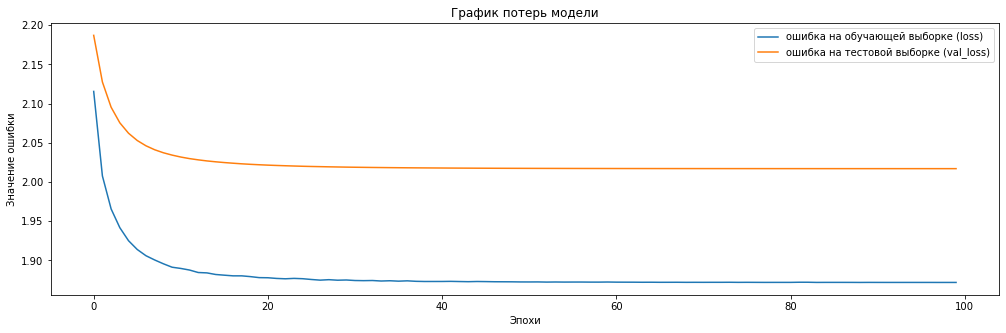

In [55]:
# Посмотрим на график потерь на тренировочной и тестовой выборках
def model_loss_plot(model_hist):
    plt.figure(figsize = (17,5))
    plt.plot(model_hist.history['loss'],
             label = 'ошибка на обучающей выборке (loss)')
    plt.plot(model_hist.history['val_loss'],
            label = 'ошибка на тестовой выборке (val_loss)')
    plt.title('График потерь модели')
    plt.ylabel('Значение ошибки')
    plt.xlabel('Эпохи')
    plt.legend()
    plt.show()
model_loss_plot(model_hist)

In [56]:
#model.save('saved_model/my_model')

In [57]:
#joblib.dump(scaler, "scaler") 